In [1]:
import ImageRepresentation
from delf import feature_io
import numpy as np
import os
saved_model = "/mnt/datasets/codebook/delf_256_model.pkl"
import matplotlib.pyplot as plt

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
ir = ImageRepresentation.ImageRepresentation(name = 'delf_bow', saved_model = saved_model)
print(ir.codebook.cluster_centers_.shape)

(256, 40)


In [8]:
imgs = ["/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_query_delf/IMG_0398.delf",
        "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_delf/1279_gsv_0.delf",
        "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_delf/2664_gsv_7.delf"]

In [9]:
features = []
for img in imgs:
    _, _, image_features, _, _ = feature_io.ReadFromFile(img)
#     image_features = np.float32(image_rsift[:, 2:])
    vector = ir.VLADEncode(image_features)
    features.append(vector)

(10240,)
(10240,)
(10240,)


0.05880965840430345 0.09651167285620302


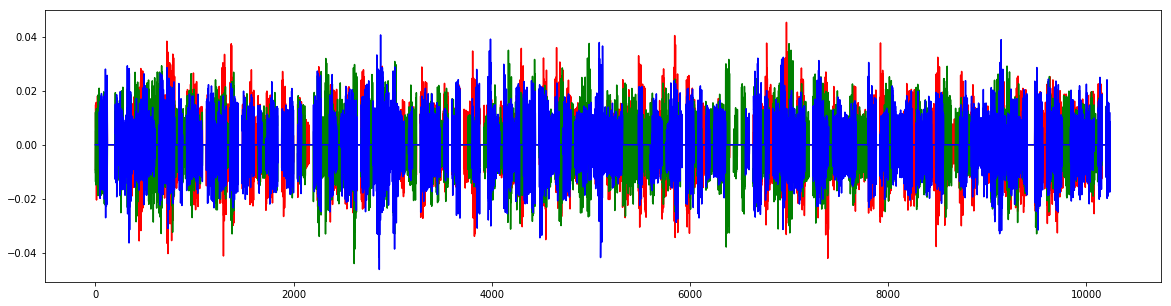

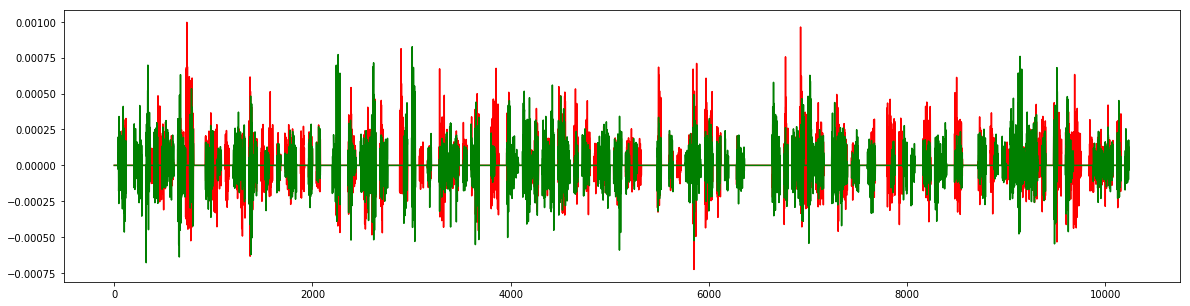

(array([2.83154635e-04, 1.09287521e-04, 8.32468731e-05, ...,
        2.21695325e-05, 3.73604316e-04, 7.54329870e-04]),
 array([0.00000000e+00, 1.95312500e-04, 3.90625000e-04, ...,
        9.99609375e-01, 9.99804688e-01, 1.00000000e+00]),
 <matplotlib.lines.Line2D at 0x7f171b48e518>)

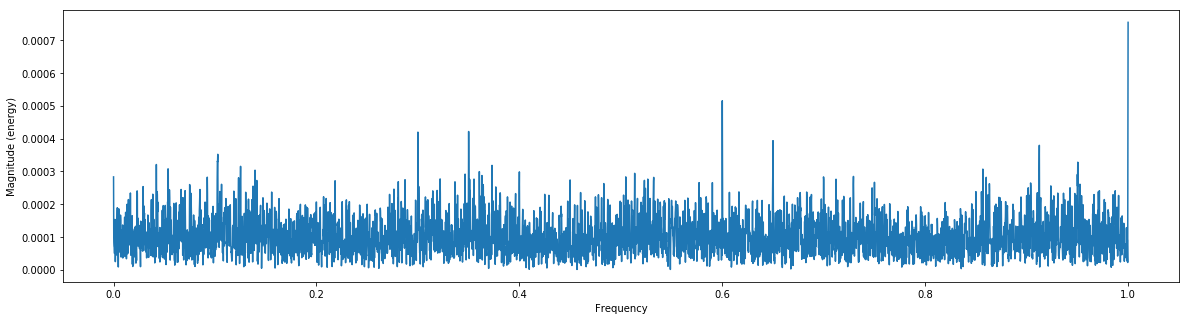

In [10]:
cmp0 = np.dot(features[0], features[1])
cmp1 = np.dot(features[0], features[2])
cmp_vec0 = features[0]*features[1];
cmp_vec1 = features[0]*features[2];
print(cmp0, cmp1)
plt.figure(figsize=(20,5))
# plt.plot(cmp_vec1, color = 'r')
# plt.plot(cmp_vec0, color = 'b')
x_indexes = np.arange(features[0].shape[0])
# print(x_indexes)
plt.plot(features[2][x_indexes],color = 'r')
plt.plot(features[1][x_indexes], color = 'g')
plt.plot(features[0][x_indexes],color = 'b')
plt.show()
plt.figure(figsize=(20,5))
plt.plot(cmp_vec1[x_indexes], color = 'r')
plt.plot(cmp_vec0[x_indexes], color = 'g')
plt.show()
plt.figure(figsize=(20,5))
plt.magnitude_spectrum(features[0])

(119, 2)
(119, 2)


/usr/local/lib/python3.5/dist-packages/skimage/transform/_geometric.py:683: RuntimeWarning: divide by zero encountered in true_divide
  H.flat[list(self._coeffs) + [8]] = - V[-1, :-1] / V[-1, -1]
/usr/local/lib/python3.5/dist-packages/skimage/transform/_geometric.py:687: RuntimeWarning: invalid value encountered in matmul
  H = np.linalg.inv(dst_matrix) @ H @ src_matrix
/usr/local/lib/python3.5/dist-packages/skimage/measure/fit.py:831: RuntimeWarning: invalid value encountered in less
  sample_model_inliers = sample_model_residuals < residual_threshold
/usr/local/lib/python3.5/dist-packages/skimage/transform/_geometric.py:683: RuntimeWarning: invalid value encountered in true_divide
  H.flat[list(self._coeffs) + [8]] = - V[-1, :-1] / V[-1, -1]


20


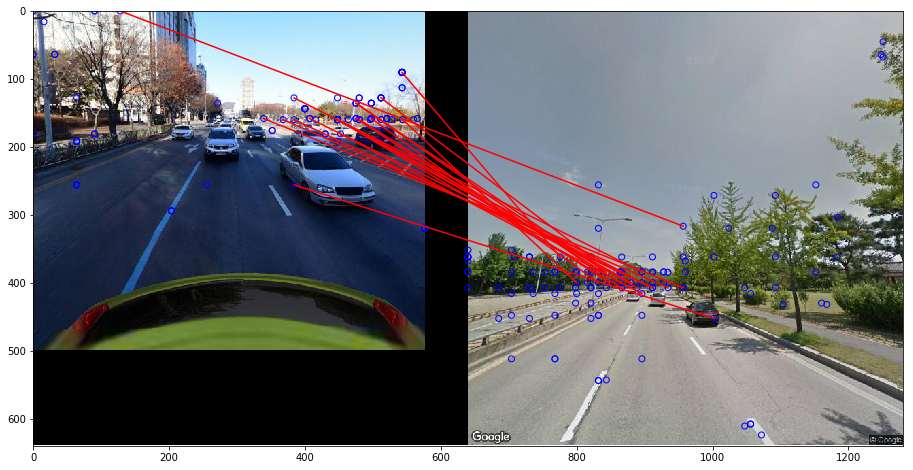

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import image as img
from scipy import spatial
from skimage import feature
from skimage import measure
from skimage import transform

loc0,_,des0,_,_ = feature_io.ReadFromFile('/home/canhld/workplace/Daejeon_street_view/datasets/sim_driving_delf/60.delf')
nums_features_0 = len(des0)
loc1,_,des1,_,_ = feature_io.ReadFromFile('/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_delf/1979_gsv_1.delf')
nums_features_1 = len(des1)
q_tree = spatial.cKDTree(des0)
_, indices = q_tree.query(des1, distance_upper_bound = 0.8)
location_to_use_1 = np.array([
            loc1[i,]
            for i in range(min(nums_features_0, nums_features_1))
            if indices[i] != nums_features_0
        ])
print(location_to_use_1.shape)
location_to_use_0 = np.array([
            loc0[indices[i],]
            for i in range(min(nums_features_0, nums_features_1))
            if indices[i] != nums_features_0
        ])
print(location_to_use_0.shape)
_, inliers = measure.ransac((location_to_use_0, location_to_use_1),
                          transform.AffineTransform,
                          min_samples=3,
                          residual_threshold=20,
                          max_trials=1000)
print(sum(inliers))
im0 = img.imread('/home/canhld/workplace/Daejeon_street_view/datasets/sim_driving/60.jpg')
im1 = img.imread("/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1/1979_gsv_1.jpg")
f = plt.figure(figsize=(20,8))
inliers_idx = np.nonzero(inliers)[0]
feature.plot_matches(plt, im0, im1, location_to_use_0, location_to_use_1, np.column_stack((inliers_idx, inliers_idx)), keypoints_color='b', only_matches=0, matches_color= 'r')

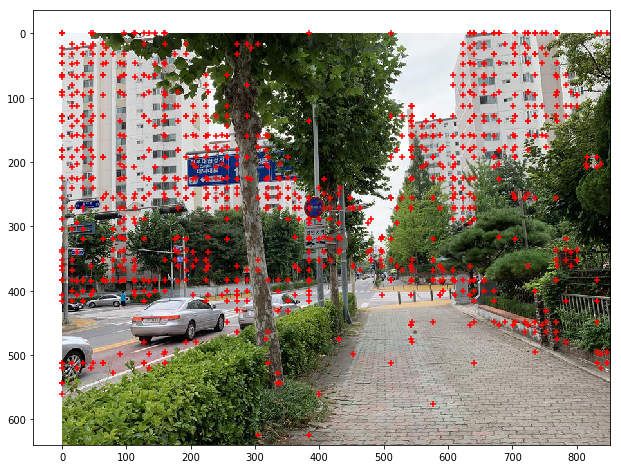

In [51]:
loc,_,des,_,_ = feature_io.ReadFromFile('/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_query_delf/IMG_0407.delf')
plt.figure(figsize=(20,8))
y = loc[:,0]
x = loc[:,1]
im = img.imread("/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_query_full/IMG_0407.jpg")
plt.imshow(im)
plt.scatter(x, y,color='red', marker='+')

In [ ]:
import ThesisToolkit
query_dir = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_query_raw/"
database_indexes = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1.csv"
query_indexes = "/home/canhld/workplace/Daejeon_street_view/datasets/daejeon_sv_v1_query_25m.csv"

In [ ]:
query_tool = ThesisToolkit.QueryToolkit(name = "test")

In [ ]:
query_tool.AnnotatesQueries(query_dir=query_dir, query_indexes=query_indexes, database_indexes=database_indexes, bound = 25)